In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, mannwhitneyu, pointbiserialr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [4]:

# 2. Load cleaned dataset
data = pd.read_csv(r"C:\Users\0911d\Desktop\Human-Resources\Human-Resources\Machine_Learning\data\HR-Employee-Attrition_cleaned.csv")



In [5]:

# 3. Quick check
print(data.head())
print(data.info())
print(data['Attrition'].value_counts())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1     

In [6]:

# 4. Encode target
data['Attrition_flag'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [7]:

# 5. Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.drop('Attrition').tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition_flag').tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


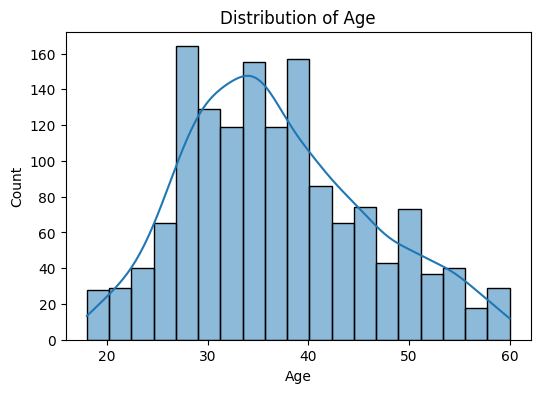

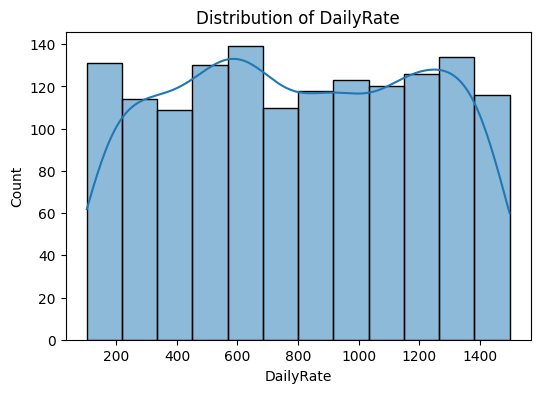

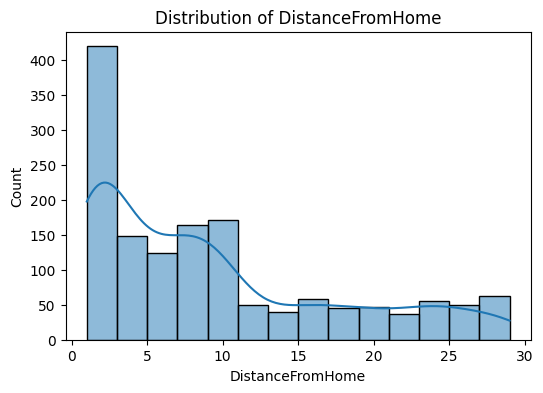

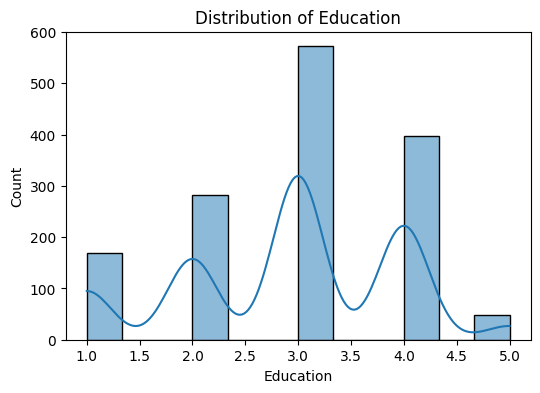

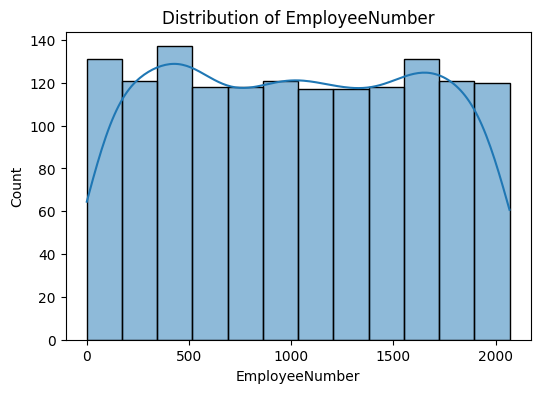

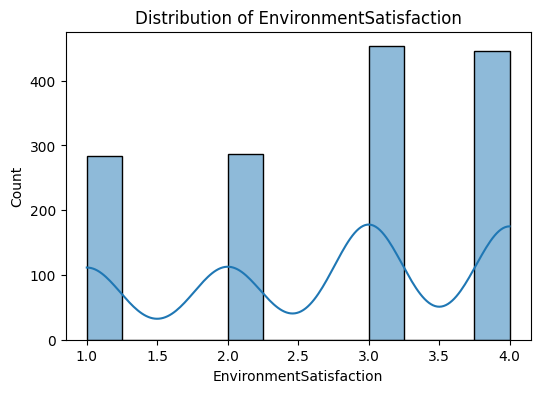

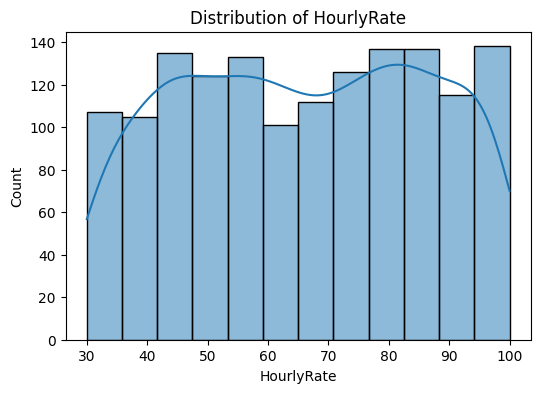

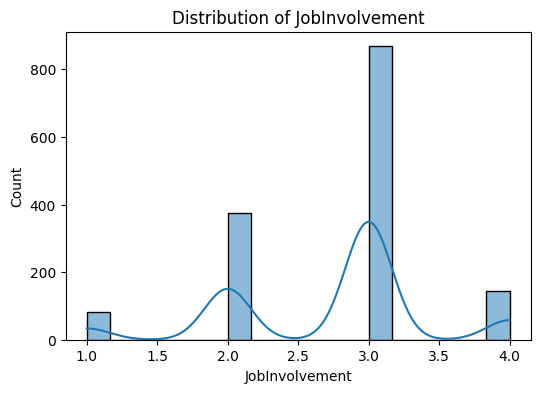

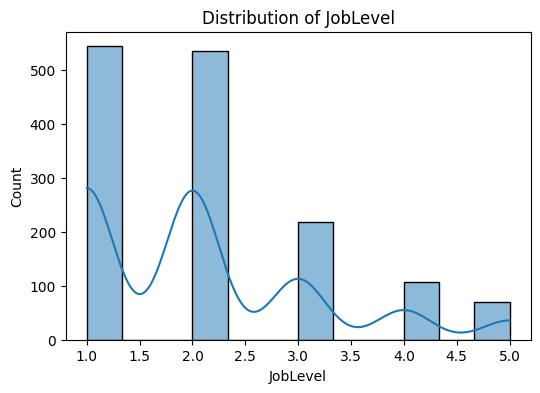

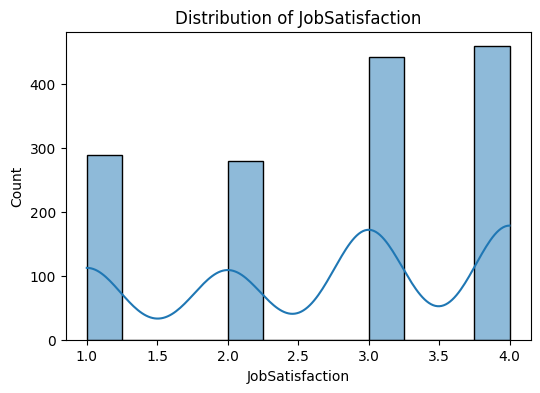

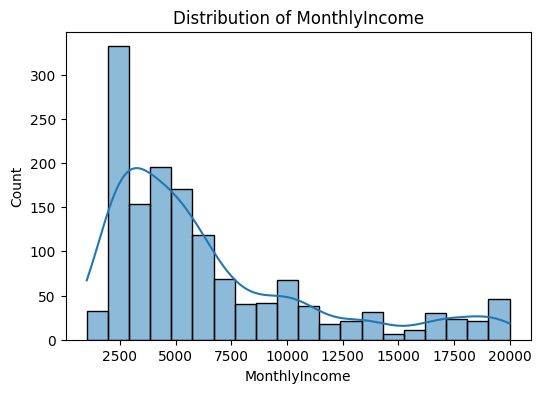

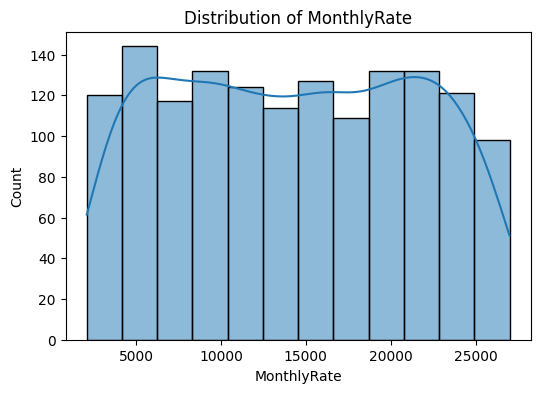

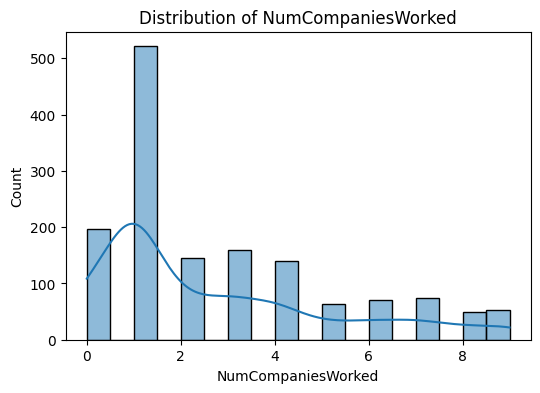

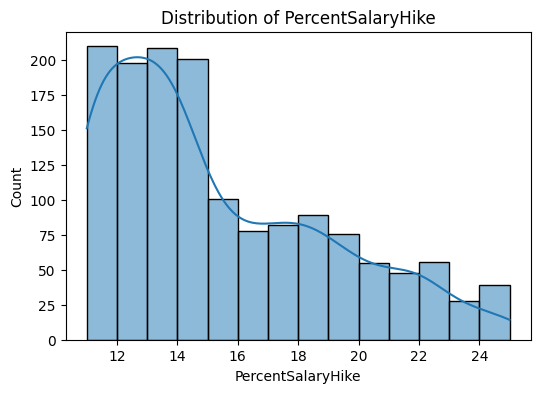

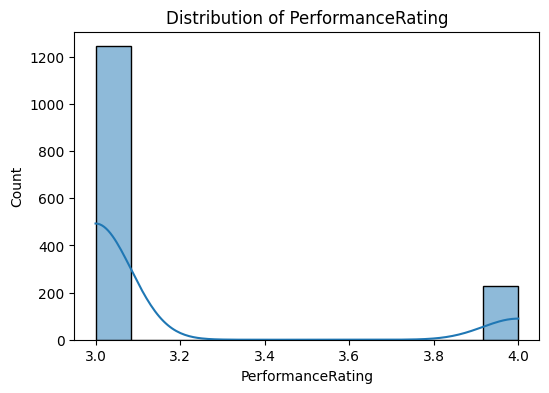

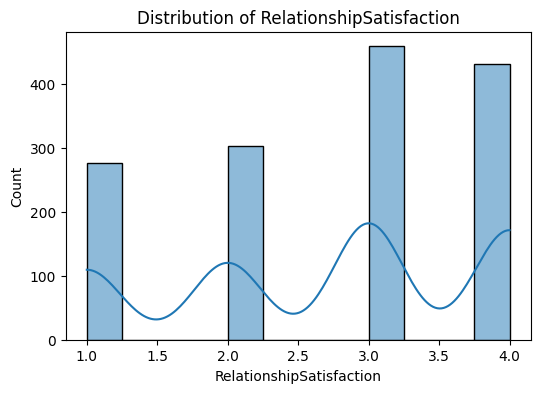

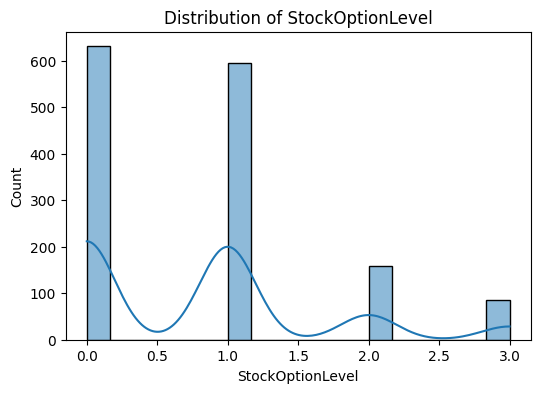

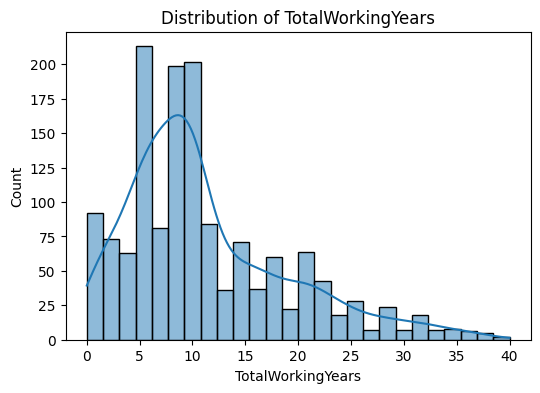

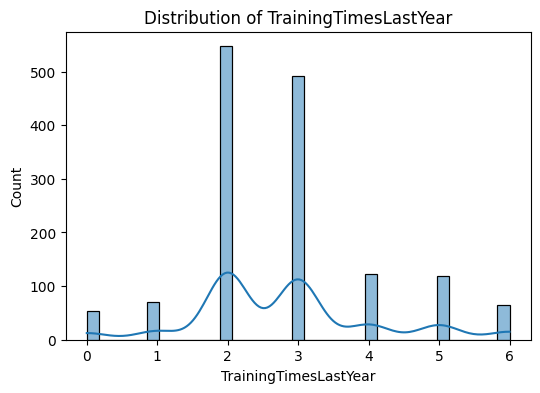

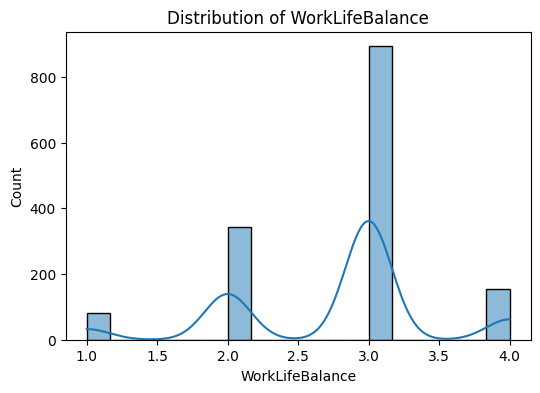

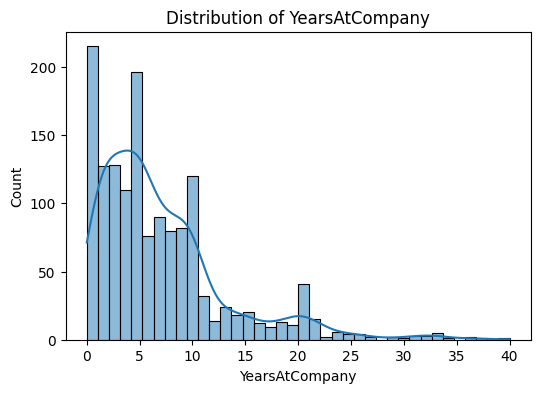

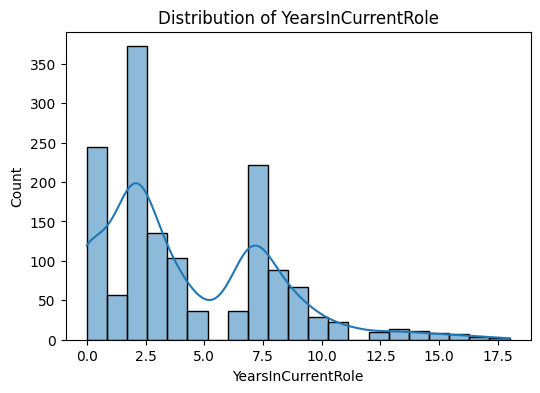

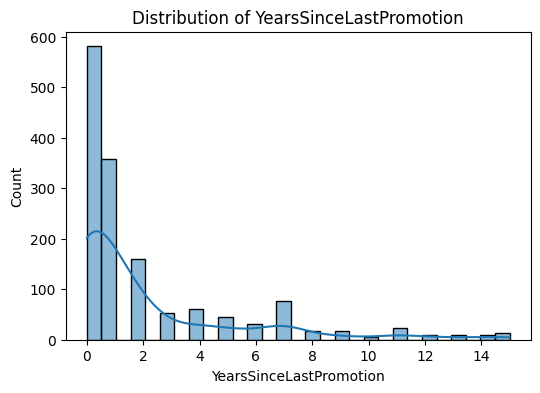

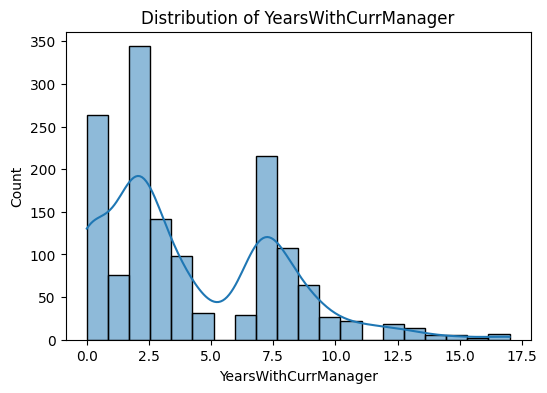

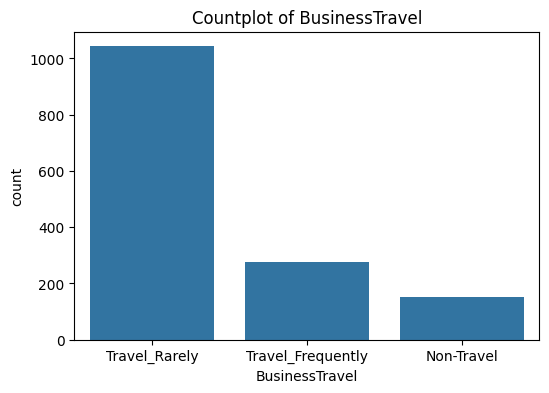

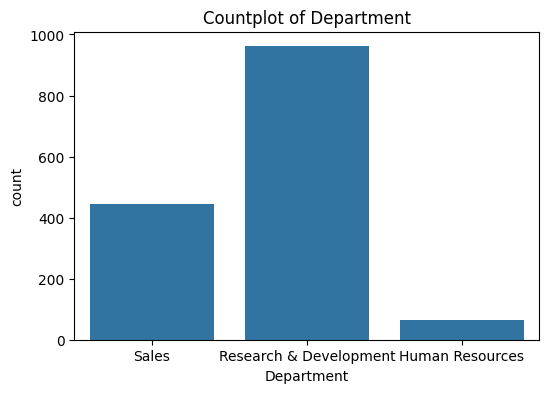

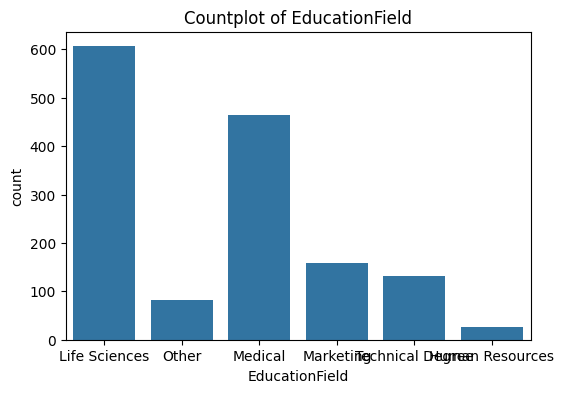

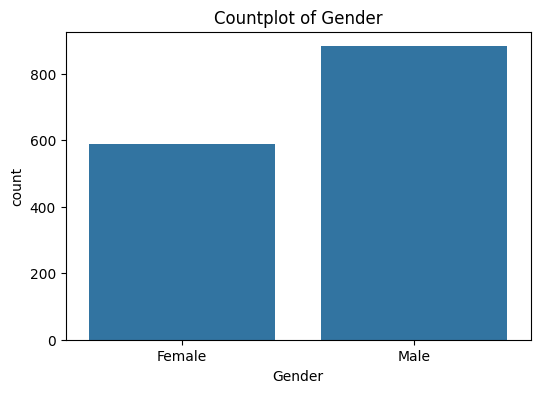

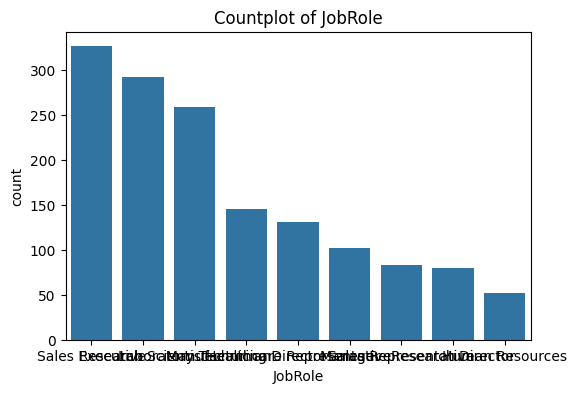

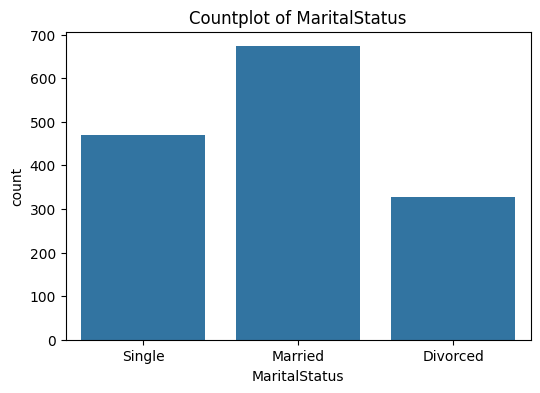

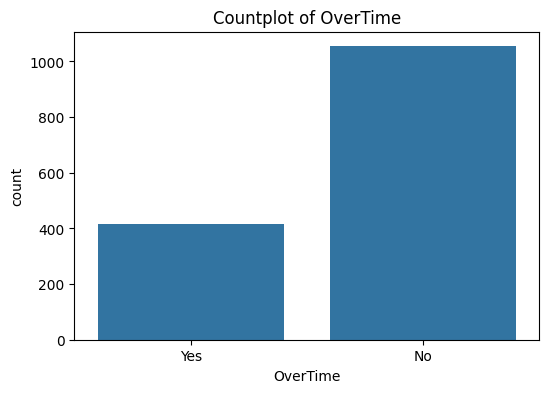

In [8]:

# 6. Basic EDA
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.show()


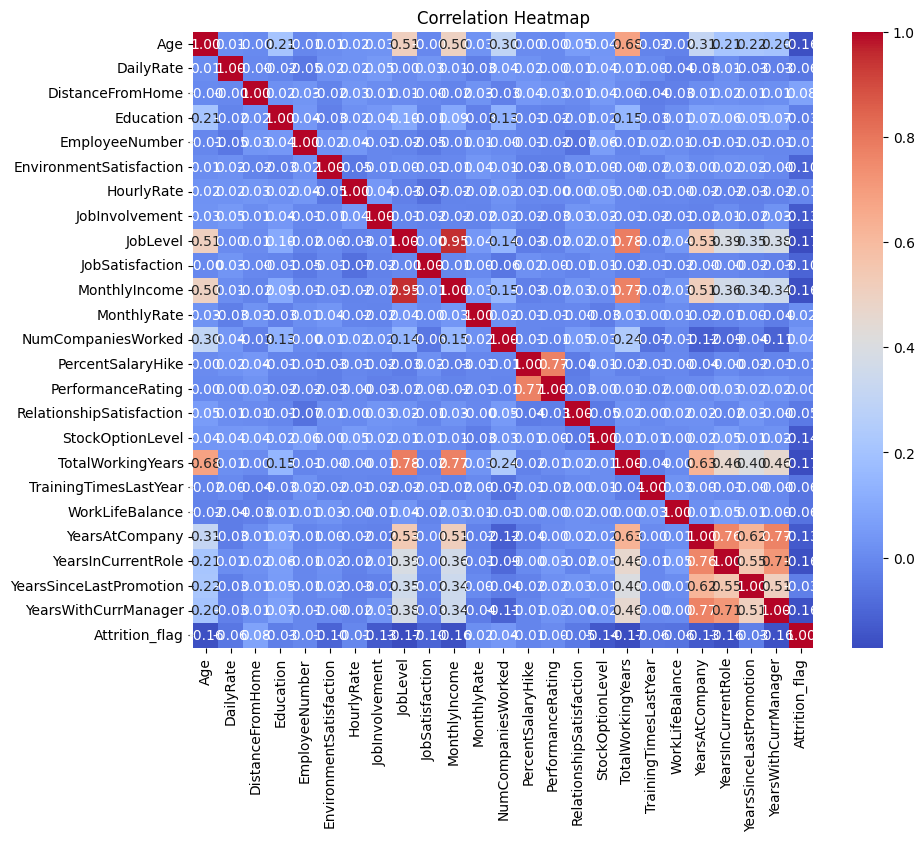

In [9]:

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data[numerical_cols + ['Attrition_flag']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:

# 7. Hypothesis Testing
print("\n--- Hypothesis Testing ---\n")



--- Hypothesis Testing ---



In [11]:

# Categorical vs Attrition: Chi-square
for col in categorical_cols:
    table = pd.crosstab(data[col], data['Attrition'])
    chi2, p, dof, ex = chi2_contingency(table)
    print(f"Chi-square test for {col}: p-value = {p:.4f}")


Chi-square test for BusinessTravel: p-value = 0.0000
Chi-square test for Department: p-value = 0.0045
Chi-square test for EducationField: p-value = 0.0068
Chi-square test for Gender: p-value = 0.2906
Chi-square test for JobRole: p-value = 0.0000
Chi-square test for MaritalStatus: p-value = 0.0000
Chi-square test for OverTime: p-value = 0.0000


In [12]:

# Numerical vs Attrition: Point-biserial or Mann-Whitney
for col in numerical_cols:
    stat, p = mannwhitneyu(data[data['Attrition_flag']==1][col],
                            data[data['Attrition_flag']==0][col])
    corr, _ = pointbiserialr(data['Attrition_flag'], data[col])
    print(f"{col}: Mann-Whitney p = {p:.4f}, Point-biserial r = {corr:.2f}")


Age: Mann-Whitney p = 0.0000, Point-biserial r = -0.16
DailyRate: Mann-Whitney p = 0.0290, Point-biserial r = -0.06
DistanceFromHome: Mann-Whitney p = 0.0024, Point-biserial r = 0.08
Education: Mann-Whitney p = 0.2448, Point-biserial r = -0.03
EmployeeNumber: Mann-Whitney p = 0.6911, Point-biserial r = -0.01
EnvironmentSatisfaction: Mann-Whitney p = 0.0002, Point-biserial r = -0.10
HourlyRate: Mann-Whitney p = 0.7976, Point-biserial r = -0.01
JobInvolvement: Mann-Whitney p = 0.0000, Point-biserial r = -0.13
JobLevel: Mann-Whitney p = 0.0000, Point-biserial r = -0.17
JobSatisfaction: Mann-Whitney p = 0.0001, Point-biserial r = -0.10
MonthlyIncome: Mann-Whitney p = 0.0000, Point-biserial r = -0.16
MonthlyRate: Mann-Whitney p = 0.5587, Point-biserial r = 0.02
NumCompaniesWorked: Mann-Whitney p = 0.2424, Point-biserial r = 0.04
PercentSalaryHike: Mann-Whitney p = 0.3655, Point-biserial r = -0.01
PerformanceRating: Mann-Whitney p = 0.9119, Point-biserial r = 0.00
RelationshipSatisfaction: M

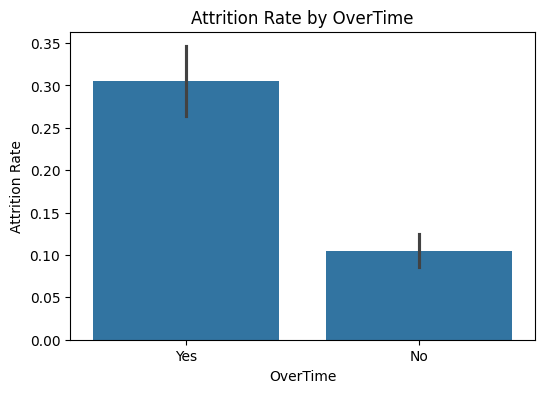

OverTime
No     0.104364
Yes    0.305288
Name: Attrition_flag, dtype: float64


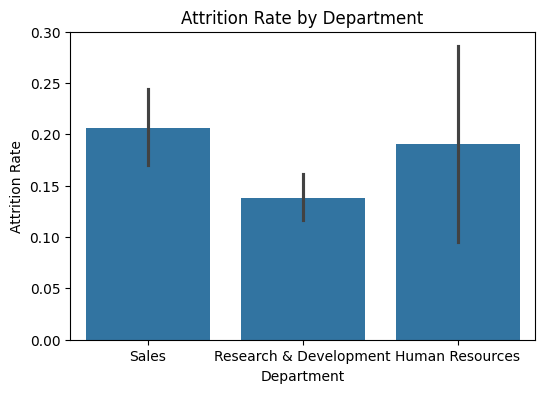

Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition_flag, dtype: float64


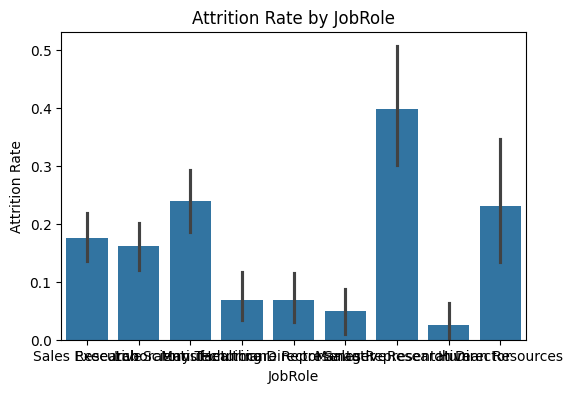

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: Attrition_flag, dtype: float64


In [13]:

# 8. Subgroup Analysis (Attrition by key categories)
key_cols = ['OverTime', 'Department', 'JobRole']
for col in key_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Attrition_flag', data=data)
    plt.title(f'Attrition Rate by {col}')
    plt.ylabel('Attrition Rate')
    plt.show()
    print(data.groupby(col)['Attrition_flag'].mean())


In [14]:

# 9. Preprocessing pipeline
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


In [15]:

# 10. Split data into training and test sets
X = data.drop(['Attrition', 'Attrition_flag'], axis=1)
y = data['Attrition_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:

# 11. Create full pipeline with classifier
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [17]:

# 12. Train model
clf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'Performan...
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [18]:

# 13. Make predictions
y_pred = clf_pipeline.predict(X_test)


In [19]:

# 14. Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8367346938775511

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294


Confusion Matrix:
 [[240   7]
 [ 41   6]]


In [20]:

# 15. Save trained model
joblib.dump(clf_pipeline, '../models/random_forest_hr_attrition.pkl')
print("Model saved successfully.")


Model saved successfully.
